<div style="text-align: right">CSCI E-7 Introduction to Python Programming for Life Sciences</div>
<div style="text-align: right">Dino Konstantopoulos, 29 May 2019</div>
<div style="text-align: right">**Review: Python libraries: subprocess**</div>

I received the following email from one of you:

> From: Dhruv Patel <notifications@instructure.com>
Sent: Monday, April 22, 2019 5:23 PM

>To: Konstantopoulos, Constantin

> Subject: Automated Python Scripts for scientific data analysis 

> Good evening Professor, 
Wish this message finds you well. 

> I'm currently enrolled in your Python for Life sciences and I was wondering if it would be possible for you to teach us how to create Automated Python Scripts for scientific data analysis. 
I know in these following weeks we are suppossed to learn about shrinking data, data modelling and classisification/clustering using scikit-learn. 
But how do we use all of these in a production environment? 
For instance, can you demo creating an automated analysis script from start to finish using Python's Pandas, Scikit-learn, visualization, decision trees, regression, clustering, etc. ?

> Looking forward to anything in lecture in regards to this matter. 

> Thanks, 
>Dhruv Reddy Patel. 

And I thought, we are always coding *standlone* lines of functionality in class. What if we have to orchestrate an **entire production process**, as Dhruv points out above? Joining all libraries we used in class into one big production process would be wicked interesting and a real challenge for yours truly, to be frank. Maybe I can work on something like that for next class culminating into scikit-learn, which additionally, also teaches you **how** to begin writing a program, as another good question in class was:

> I think you taught us how to write single line of code, professor, but **how** do we put a bunch of lines of code together towards a bigger functionality?

But I always like to start with **baby steps**, so, to that end, let's learn how we can orchestrate modules of python code, so that one module can coordinate a bunch of other modules. This is, in fact, a very important subtopic in **Enterprise Programming**, and specfically in a brach of enterprise programming called **microservice architectures**.

So, let's lean about Python's `subprocess` module.


# Python `subprocess` module

The module `subprocess` is Python’s workhorse for command-line interactions. In this notebook, we'll create a small chain of processes that run on the command line, and then we'll control them through the notebook.

First, we install [opencv](https://opencv.org/), the most popular computer vision library today. Why? Did you know that i'm a huge comic book fan?

<br />
<center>
<img src = ipynb.images/snowpiercer-train.jpg width = 500 />
</center>

Open a command line and run the following command (minus the `#!`). In dire situations, run the cell below (remove the `#`). But better to run in a terminal than to run in a notebook cell.

In [ ]:
#!pip install opencv-python

Let's run a test: download your favorite image, put it in the data folder that can be reached from your `cwd`, and run:

In [1]:
!pwd

/Users/jlee/Desktop/CSCI E-7/Lecture12


ok, do I have a `data` subfolder in that folder? I do? ok, all good then, I can run the cell below. Otherwise, adapt.. 

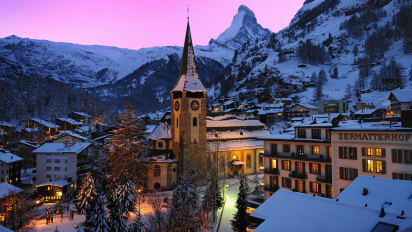

In [20]:
from IPython.display import Image
Image(filename='data/img_example.jpg', width=400)

In [2]:
import cv2
 
# read image as grey scale
grey_img = cv2.imread('data/img_example.jpg', cv2.IMREAD_GRAYSCALE)
 
# save image
status = cv2.imwrite('data/img_example_grey.png',grey_img)
 
print("Image written to file-system : ",status)

Image written to file-system :  True


Open and examine `img_example_grey.png`. Is it greyscale?

Cool. Now let's write a program to downsample the image, smooth it out, then upsample it to original size. This will remove details. Read about [gaussian pyramids](https://en.wikipedia.org/wiki/Pyramid_(image_processing)#Gaussian_pyramid), and about [bilateral filters](https://docs.opencv.org/2.4/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html).

In [3]:
import cv2
 
num_down = 2       # number of downsampling steps
num_bilateral = 7  # number of bilateral filtering steps
 
img_rgb = cv2.imread("data/img_example.jpg")
 
# downsample image using Gaussian pyramid
img_color = img_rgb
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)
 
# repeatedly apply small bilateral filter instead of applying one large filter
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

# upsample image to original size
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

Then let's convert it to greyscale and apply a median blur filter.

In [4]:
# convert to grayscale and apply median blur
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

Then detect and enhance edges to produce a *drawing effect*:

In [5]:
# detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

The convert back to color and superimpose (also called [bitblt](https://en.wikipedia.org/wiki/Bit_blit)-ing) what we obtain with the original image:

In [6]:
# convert back to color, bit-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)
 
# save
cv2.imwrite('data/cartoon.png', img_cartoon)

True

Couldn't get the below API to work:

In [ ]:
# display
#cv2.imshow("cartoon", img_cartoon)

Verify in your data folder that you have a cartoon-stylized image called `cartoon.png`. Then, this does:

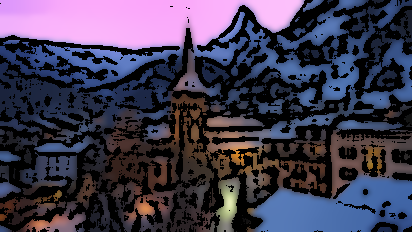

In [19]:
from IPython.display import Image
Image(filename='data/cartoon.png', width=400)

Now that's a *neat* cartoon!

## Creating a python source code file to run on the command line

Open a text file called `downsample.py` and enter the following code, which does what we did in the cell above:
```(python)
import cv2
 
num_down = 2       # number of downsampling steps
num_bilateral = 7  # number of bilateral filtering steps
 
img_rgb = cv2.imread("img_example.jpg")
 
# downsample image using Gaussian pyramid
img_color = img_rgb
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)
 
# repeatedly apply small bilateral filter instead of applying one large filter
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

# upsample image to original size
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

cv2.imwrite('downsample.png', img_color)
```

Now verify that it runs by opening an **anaconda** terminal and running:
```(python)
python downsample.py
```

You should have a new file called `downsample.png` in your current folder.

Now let's change the code so that it takes arguments.

Write a new file called `test.py` and enter the following:
```(python)
import sys

try:
    print ('Number of arguments:', len(sys.argv), 'arguments.')
    print ('Argument List:', str(sys.argv))
except:
    e = sys.exc_info()[0]
    print (e)
```

Now enter on the command line:
```(python)
python test hello world here I am
```

What do you get?

Now rewrite `downsample.py` so that you can specify a different input and output file argument and run it to see if it works.

Then write file `cartooned.py` to include:
- the 2nd in the process: converting to greyscale and applying a gaussian blur 
- the 3rd step in the process: detecting and enhancing edges and produce a *drawing effect*
- the 4th step in the process: converting back to color and ANDing with color image to produce the desired cartoon effect

In the end, you should have **two** steps to run in the command line:
```(python)
python downsample.py my_original_img.jpg downsampled_image.png
python cartooned.py downsampled_image.png cartoon.png
```

Verify that strting with any jpg image, you end up with a cartooned png image.

Now, let's control the process from this notebook, instead:

In [11]:
import subprocess
subprocess.call(['python', 'data/downsample2.py', 'data/img_example.jpg', 'data/subsampled.png'])

2

and finally:

In [12]:
subprocess.call(['python', 'data/cartooned.py', 'data/subsampled.png', 'data/cartooned.png'])

2

# Homework

Write python modules that you can call from a python notebook to coordinate taking all your vacation pictures and writing a cartoon comic with the pictures following each other chronologically (you will have to call system date functions to sort by chronological date) just like in a cartoon page. You'll need to add `subprocess` calls in a for or while loop in order to process all your pictures. You will also have to divide by the number of pictures to add per line. You may limit yourself to one cartoon page.

For extra credit, can you add text bubbles to your cartoon strip? We'll **showcase** the top 3 best cartoon strips in class!

This homework will exercise not only your orchestration of command-line processes, btu also your googling of `opencv` APIs, as API googling is just as important as writing code from scratch.

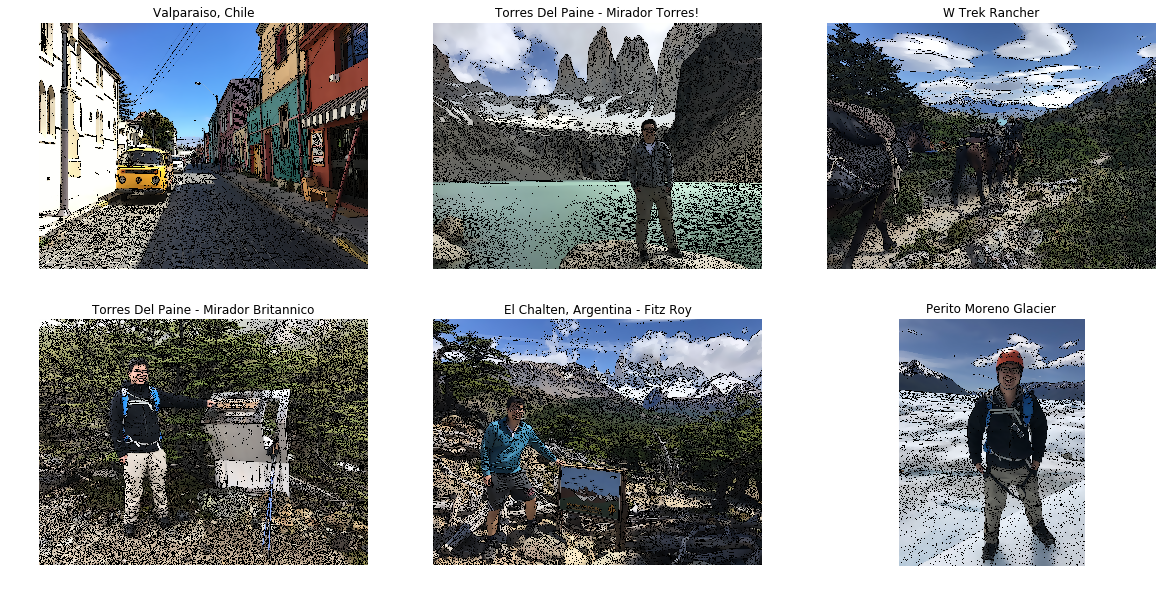

In [53]:
import cv2
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

#Run python to execute the cartoonize script and convert the original vacation files to their cartoon form
subprocess.call(['python', 'patagonia/cartoonize.py', 'patagonia/IMG_0045.JPG', 'patagonia/cartoon/IMG_0045_cart.png'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
subprocess.call(['python', 'patagonia/cartoonize.py', 'patagonia/IMG_1125.JPG', 'patagonia/cartoon/IMG_1125_cart.png'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
subprocess.call(['python', 'patagonia/cartoonize.py', 'patagonia/IMG_1193.JPG', 'patagonia/cartoon/IMG_1193_cart.png'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
subprocess.call(['python', 'patagonia/cartoonize.py', 'patagonia/IMG_1265.JPG', 'patagonia/cartoon/IMG_1265_cart.png'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
subprocess.call(['python', 'patagonia/cartoonize.py', 'patagonia/IMG_1412.JPG', 'patagonia/cartoon/IMG_1412_cart.png'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
subprocess.call(['python', 'patagonia/cartoonize.py', 'patagonia/IMG_1563.JPG', 'patagonia/cartoon/IMG_1563_cart.png'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

#Load and name these cartoon values
img1 = mpimg.imread("patagonia/cartoon/IMG_0045_cart.png")
img2 = mpimg.imread("patagonia/cartoon/IMG_1125_cart.png")
img3 = mpimg.imread("patagonia/cartoon/IMG_1193_cart.png")
img4 = mpimg.imread("patagonia/cartoon/IMG_1265_cart.png")
img5 = mpimg.imread("patagonia/cartoon/IMG_1412_cart.png")
img6 = mpimg.imread("patagonia/cartoon/IMG_1563_cart.png")

#Create a grid and insert the images (20 x 10 dimensions per grid)
f, axarr = plt.subplots(2, 3,figsize=(20,10))

#Display the corresponding image and create a title
axarr[0,0].imshow(img1, cmap = cm.Greys_r)
axarr[0,0].set_title("Valparaiso, Chile")
axarr[0,0].axis('off')

axarr[0,1].imshow(img2, cmap = cm.Greys_r)
axarr[0,1].set_title("Torres Del Paine - Mirador Torres!")
axarr[0,1].axis('off')

axarr[0,2].imshow(img3, cmap = cm.Greys_r)
axarr[0,2].set_title("W Trek Rancher")
axarr[0,2].axis('off')

axarr[1,0].imshow(img4, cmap = cm.Greys_r)
axarr[1,0].set_title("Torres Del Paine - Mirador Britannico")
axarr[1,0].axis('off')

axarr[1,1].imshow(img5, cmap = cm.Greys_r)
axarr[1,1].set_title("El Chalten, Argentina - Fitz Roy")
axarr[1,1].axis('off')

axarr[1,2].imshow(img6, cmap = cm.Greys_r)
axarr[1,2].set_title("Perito Moreno Glacier")
axarr[1,2].axis('off')

#plt.subplot(231),plt.imshow(img1,'gray'),plt.title('Valparaiso, Chile')
#plt.subplot(232),plt.imshow(img2,'gray'),plt.title('Torres Del Paine - Mirador Torres!')
#plt.subplot(233),plt.imshow(img3,'gray'),plt.title('W Trek Rancher')
#plt.subplot(234),plt.imshow(img4,'gray'),plt.title('Torres Del Paine - Mirador Britannico')
#plt.subplot(235),plt.imshow(img5,'gray'),plt.title('El Chalten, Argentina - Fitz Roy')
#plt.subplot(236),plt.imshow(img6,'gray'),plt.title('Perito Moreno Glacier')

#Display the images!
plt.show()

In [6]:
import cv2
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import os, os.path, time

#In this case, I try to use a for loop to read in all of my vacation photos... having errors
count = 0
#Read in all of the files listed in the patagonia folder (with .jpg names)
for file in os.listdir("patagonia"):
    if file.endswith('.JPG') or file.endswith('.jpg'):
        #Make a subprocess call and create a new cartoon patagonia image
        print(file)
        subprocess.call(["python", "patagonia/cartoonize.py", "patagonia/"+str(file), "patagonia/cartoon/"+str(file)+"_cart_"+str(time.ctime(os.path.getctime(file)))], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

img1 = mpimg.imread("patagonia/cartoon/IMG_0045_cart.jpg")
img2 = mpimg.imread("patagonia/cartoon/IMG_1125_cart.jpg")
img3 = mpimg.imread("patagonia/cartoon/IMG_1193_cart.jpg")
img4 = mpimg.imread("patagonia/cartoon/IMG_1265_cart.jpg")
img5 = mpimg.imread("patagonia/cartoon/IMG_1412_cart.jpg")
img6 = mpimg.imread("patagonia/cartoon/IMG_1563_cart.jpg")

f, axarr = plt.subplots(2, 3,figsize=(20,10))

axarr[0,0].imshow(img1, cmap = cm.Greys_r)
axarr[0,0].set_title("Valparaiso, Chile")
axarr[0,0].axis('off')

axarr[0,1].imshow(img2, cmap = cm.Greys_r)
axarr[0,1].set_title("Torres Del Paine - Mirador Torres!")
axarr[0,1].axis('off')

axarr[0,2].imshow(img3, cmap = cm.Greys_r)
axarr[0,2].set_title("W Trek Rancher")
axarr[0,2].axis('off')

axarr[1,0].imshow(img4, cmap = cm.Greys_r)
axarr[1,0].set_title("Torres Del Paine - Mirador Britannico")
axarr[1,0].axis('off')

axarr[1,1].imshow(img5, cmap = cm.Greys_r)
axarr[1,1].set_title("El Chalten, Argentina - Fitz Roy")
axarr[1,1].axis('off')

axarr[1,2].imshow(img6, cmap = cm.Greys_r)
axarr[1,2].set_title("Perito Moreno Glacier")
axarr[1,2].axis('off')

plt.show()

IMG_1125.JPG


FileNotFoundError: [Errno 2] No such file or directory: 'IMG_1125.JPG'

In [5]:
import os, os.path, time

path ='patagonia'
jpg_files = [file for file in os.listdir(path) if file.endswith('.JPG') or file.endswith('.jpg')]
print(jpg_files)

['IMG_1125.JPG', 'IMG_1193.JPG', 'IMG_1412.JPG', 'IMG_0045.JPG', 'IMG_1563.jpg', 'IMG_1265.JPG']
